# HBV-SASK

Saman Razavi and Andrew Ireson

### Objective:

This notebook runs the HBV-SASK model. You must first select which basin you are going to work on, then set the parameters, then run the model and then plot the outputs. 

# Exercise 2

## HBV-SASK Code in Python

As usual let's import some important libraries to make life easier:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import hbv

from scipy.optimize import minimize
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

We have data available for two watersheds to analyze (see Figure 1):
* Bow River Basin, and
* Oldman River Basin

<img src="img/watersheds.png" align="center"/>

<p><center>Figure 1. The location of Bow and Oldman watersheds</center></p>

We must then select one and asign its name to the ***basin*** variable down here:

In [2]:
basin      = 'Oldman Basin' # or 'Banff Basin'

As could be seen in the diagram of the HBV-SASK model (Figure 2), there are 12 parameters (Table 1) that their values must be identified:

<img src="img/HBV-SASK.png" width=400 height=800 align="center"/>

<p><center>Figure 2. The diagram of the HBV-SASK model </center></p>

And the variables are:

<p><center>Table 1. The parameters of the HBV-SASK model </center></p>

| Parameter | Description |
| :--------:|:---------- |
|$TT$       | Air temperature threshold in °C for melting/freezing and separating rain and snow|
|$C0$       | Base melt factor, in mm/°C per day|
|$ETF$      | Temperature anomaly correction in 1/°C of potential evapotranspiration|
|$LP$       | Limit for PET as a multiplier to FC, i.e., soil moisture below which evaporation becomes supply limited|
|$FC$       | Field capacity of soil, in mm. The maximum amount of water that the soil can retain|
|$\beta$    | Shape parameter (exponent) for soil release equation (unitless)|
|$FRAC$     | Fraction of soil release entering fast reservoir (unitless)|
|$K_{1}$    | Fast reservoir coefficient, which determines what proportion of the storage is released per day (unitless)|
|$\alpha$   | Shape parameter (exponent) for fast reservoir equation (unitless)|
|$K_{2}$    | Slow reservoir coefficient which determines what proportion of the storage is released per day (unitless)|
|$UBAS$     | Base of unit hydrograph for watershed routing in day; default is 1 for small watersheds|
|$PM$       | Precipitation multiplier to account for uncertainty (bias) in precipitation (unitless); default is 1|

<a id='section2codes'></a>
So let's assign some values to each variable and run the model for the basin of interest for now:

In [9]:
par_values         ={}

par_values['TT']   =4.0
par_values['C0']   =1.0
par_values['ETF']  =0.1
par_values['LP']   =0.3
par_values['FC']   =500.0
par_values['beta'] =2.0
par_values['FRAC'] =0.7
par_values['K1']   =0.05
par_values['alpha']=1.5
par_values['K2']   =0.01
par_values['UBAS'] =1.0
par_values['PM']   =1.0

par_values['basin']=basin

In [10]:
# running HBV-SASK Model
flux, state, forcing = hbv.HBV_SASK(basin, par_values)

# and loading observed streamflow for comparison
Qobs                 = hbv.obs_streamflow(basin)

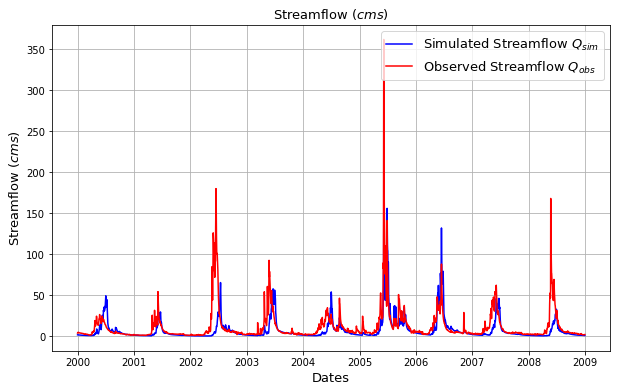

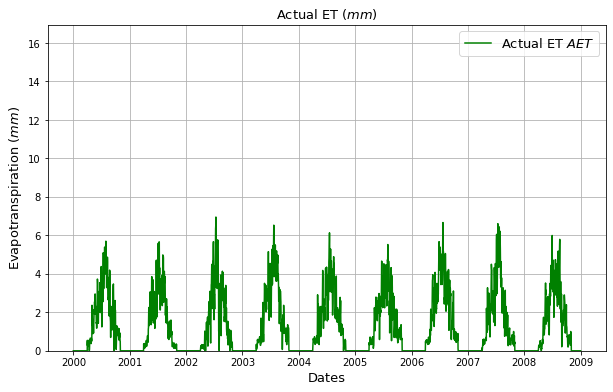

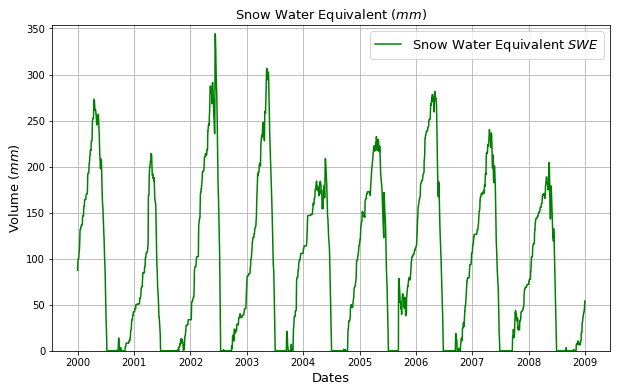

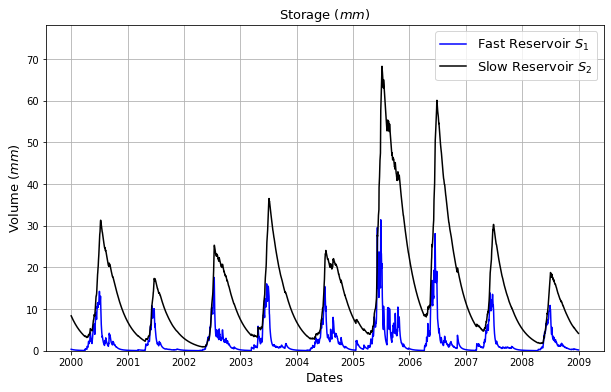

In [11]:
# let's plot observed and simulated streamflow time-series
start    = '2000'
end      = '2008'

# Plot performance
fig = plt.figure(figsize=(10, 6))
plt.gca().set_title(r'Streamflow $(cms)$', fontsize = 13)
plt.gca().plot(flux['Q_cms'][start:end], '-', color='blue', label=r'Simulated Streamflow $Q_{sim}$')
plt.gca().plot(Qobs[start:end], '-', color='red', label=r'Observed Streamflow $Q_{obs}$')
plt.gca().set_ylabel(r'Streamflow $(cms)$', fontsize = 13)
plt.gca().set_xlabel('Dates', fontsize=13)
plt.gca().grid()
plt.gca().legend(loc='upper right', fontsize = 13)

et  = plt.figure(figsize=(10, 6))
plt.gca().set_title(r'Actual ET $(mm)$', fontsize = 13)
plt.gca().set_ylim(top=flux['AET'][start:end].max() + 10)
plt.gca().plot(flux['AET'][start:end], color='green', label=r'Actual ET $AET$')
plt.gca().set_ylabel(r'Evapotranspiration $(mm)$', fontsize = 13)
plt.gca().set_xlabel('Dates', fontsize=13)
plt.gca().grid()
plt.gca().legend(loc='upper right', fontsize = 13)

swe = plt.figure(figsize=(10, 6))
plt.gca().set_title(r'Snow Water Equivalent $(mm)$', fontsize = 13)
plt.gca().set_ylim(top=state['SWE'][start:end].max() + 10)
plt.gca().plot(state['SWE'][start:end], color='green', label=r'Snow Water Equivalent $SWE$')
plt.gca().set_ylabel(r'Volume $(mm)$', fontsize = 13)
plt.gca().set_xlabel('Dates', fontsize=13)
plt.gca().grid()
plt.gca().legend(loc='upper right', fontsize = 13)

swe = plt.figure(figsize=(10, 6))
plt.gca().set_title(r'Storage $(mm)$', fontsize = 13)
plt.gca().set_ylim(top=np.maximum(state['S1'][start:end].max(), state['S2'][start:end].max()) + 10)
plt.gca().plot(state['S1'][start:end], color='blue', label=r'Fast Reservoir $S_{1}$')
plt.gca().plot(state['S2'][start:end], color='black', label=r'Slow Reservoir $S_{2}$')
plt.gca().set_ylabel(r'Volume $(mm)$', fontsize = 13)
plt.gca().set_xlabel('Dates', fontsize=13)
plt.gca().grid()
plt.gca().legend(loc='upper right', fontsize = 13)


# Andrew's codes:
# Plot all the model outputs
#hbv.PlotEverything(flux,state,forcing,start,end,'10D')

# Plot the water balance
#hbv.WaterBalancePlot(flux,state,forcing,start,end)

As noted in Exercise 2 PDF file, try different values of:
* $TT$ in range of $[-4, +4]$,
* $FC$ in range of $[+50, +500]$

and see if you could improve the results!

# Exercise 3
<a id='exercise3'></a>

Now let's assign new values to our parameters and plot some good stuff:

In [ ]:
par_values         ={}

par_values['TT']   =0.0
par_values['C0']   =1.0
par_values['ETF']  =0.1
par_values['LP']   =0.3
par_values['FC']   =250.0
par_values['beta'] =2.0
par_values['FRAC'] =0.7
par_values['K1']   =0.05
par_values['alpha']=1.5
par_values['K2']   =0.01
par_values['UBAS'] =1.0
par_values['PM']   =1.0

par_values['basin']=basin

In [ ]:
# running HBV-SASK Model
flux, state, forcing = hbv.HBV_SASK(basin, par_values)

# and loading observed streamflow for comparison
Qobs                 = hbv.obs_streamflow(basin)

In [ ]:
# let's plot observed and simulated streamflow time-series
start    = '2000'
end      = '2008'

# Plot performance
fig_n = plt.figure(figsize=(10, 6))
plt.gca().set_title(r'Streamflow $(cms)$ - Normal Scale', fontsize = 13)
plt.gca().plot(flux['Q_cms'][start:end], '-', color='blue', label=r'Simulated Streamflow $Q_{sim}$')
plt.gca().plot(Qobs[start:end], '-', color='red', label=r'Observed Streamflow $Q_{obs}$')
plt.gca().set_ylabel(r'Streamflow $(cms)$', fontsize = 13)
plt.gca().set_xlabel('Dates', fontsize=13)
plt.gca().grid()
plt.gca().legend(loc='upper right', fontsize = 13)

fig_l = plt.figure(figsize=(10, 6))
plt.gca().set_title(r'Streamflow $(cms)$ - Logarithmic Scale', fontsize = 13)
plt.gca().plot(flux['Q_cms'][start:end], '-', color='blue', label=r'Simulated Streamflow $Q_{sim}$')
plt.gca().plot(Qobs[start:end], '-', color='red', label=r'Observed Streamflow $Q_{obs}$')
plt.gca().set_ylabel(r'Streamflow $(cms)$', fontsize = 13)
plt.gca().set_xlabel('Dates', fontsize=13)
plt.gca().set_yscale('log')
plt.gca().grid()
plt.gca().legend(loc='upper right', fontsize = 13)

fig_sc = plt.figure(figsize=(5,5))
plt.gca().set_title(r'Simulated Streamflow vs. Observed Streamflow', fontsize = 13)
line_start = np.minimum(flux['Q_cms'][start:end].min(), Qobs[start:end].min().values[0])
line_end   = np.maximum(flux['Q_cms'][start:end].max(), Qobs[start:end].max().values[0])
plt.gca().plot([line_start, line_end], [line_start, line_end], 'r-')
plt.gca().scatter(flux['Q_cms'][start:end], Qobs[start:end], s=1, c='k')
plt.gca().set_ylabel(r'Observed Streamflow $(cms)$')
plt.gca().set_xlabel(r'Simulated Streamflow $(cms)$')
plt.gca().grid()
plt.gca().set_ylim(bottom=0, top=line_end)
plt.gca().set_xlim(left=0  , right=line_end)

And now, we want to calculate different performance metrics such as ***MSE-log***, ***Volume Bias***, and ***RMSE***:

In [ ]:
# first MSE
mse         = np.mean((Qobs.values.T - flux['Q_cms'].values)**2)

# second NSE
mean_obs    = np.mean(Qobs)
denominator = np.mean((Qobs - np.mean(Qobs))**2)
numerator   = np.mean((Qobs.values.T - flux['Q_cms'].values)**2)
nse         = 1 - numerator/denominator
nse         = nse.values[0]

# third MSE-log
mse_log     = np.mean((np.log(Qobs.values.T) - np.log(flux['Q_cms'].values))**2)

# forth Volume-bias
vbias       = np.mean(Qobs.values.T) - np.mean(flux['Q_cms'].values)

# fifth RMSE
rmse        = np.sqrt(np.mean((Qobs.values.T - flux['Q_cms'].values)**2))

# sixth absolute bias
abias       = np.abs(np.sum(Qobs.values.T - flux['Q_cms'].values)) / np.sum(Qobs.values.T)

# seventh mean error
me          = np.mean(Qobs.values.T - flux['Q_cms'].values)

# eighth mean absolute error
mae         = np.mean(np.abs(Qobs.values.T - flux['Q_cms'].values))

# ninth NSE-log
mean_obs_log    = np.mean(np.log(Qobs))
denominator_log = np.mean((np.log(Qobs) - mean_obs_log)**2)
numerator_log   = np.mean((np.log(Qobs.values.T) - np.log(flux['Q_cms'].values))**2)
nse_log         = 1 - numerator_log/denominator_log
nse_log         = nse_log.values[0]

In [ ]:
print('MSE value is: ', mse)
print('NSE value is: ', nse)
print('MSE-log value is: ', mse_log)
print('Volume bias value is: ', vbias)
print('RMSE value is: ', rmse)
print('Absolute bias values is: ', abias)
print('Mean error values is: ', me)
print('Mean absolute error is: ', mae)
print('NSE-log values is: ', nse_log)

Pretty much everything is done! Right now, jump to beginning of <a href='#exercise3'>Exercise 3</a> and change the values of each parameter to achieve the best result you can.